In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
# Set the number of rows for your dataset
num_rows = 200  # You can adjust this as needed

# Generate random data
data = {
    'X': np.random.uniform(-100, 100, num_rows),
    'Y': np.random.uniform(-100, 100, num_rows),
    'LABEL': np.random.randint(0, 5, num_rows)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df)

             X          Y  LABEL
0   -73.221063  45.569788      3
1   -86.580990 -42.814455      1
2    67.242013 -44.152764      0
3    19.249987  84.740854      3
4    -9.718679  85.017643      0
..         ...        ...    ...
195  45.278788 -91.581117      0
196  21.164594  41.946331      4
197 -46.404963 -52.547788      1
198  20.327659  88.188875      3
199 -20.684627  31.399169      3

[200 rows x 3 columns]


In [3]:
def normalize(input):
    if input == 0:
        return [1,0,0,0,0]
    elif input == 1:
        return [0,1,0,0,0]
    elif input == 2:
        return [0,0,1,0,0]
    elif input == 3:
        return [0,0,0,1,0]
    elif input == 4:
        return [0,0,0,0,1]

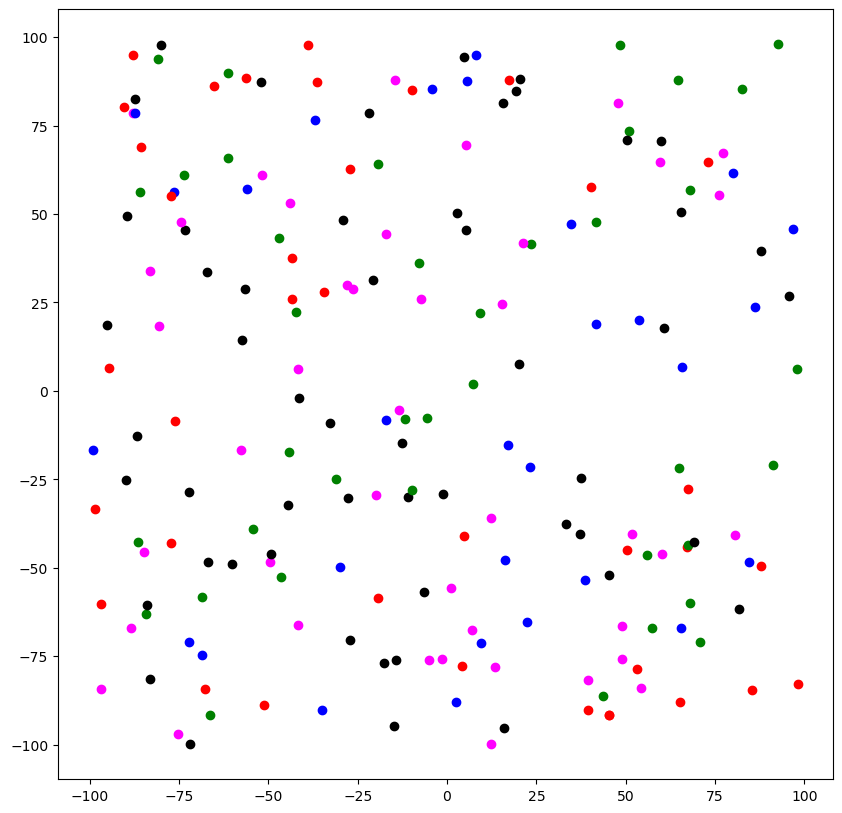

In [4]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

# plotting all points

plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="red",marker="o")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], c="green",marker="o")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="blue",marker="o")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="black",marker="o")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="magenta",marker="o")
plt.show()

In [5]:
features = list(zip(X1, X2)) #zipping the 2 input features into a list

features_np = np.array(features) #converting the list into a numpy array
 # normalizing the output labels to be one-hot encoded and
 # turning it into a numpy array

Y2 = np.array([normalize(i) for i in Y])

In [6]:
# dividing the total set into training (150) & testing (50) sets

features_train = features_np[:150]
Y2_train = Y2[:150]

features_test = features_np[50:]
Y2_test = Y2[50:]

In [7]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 200
        hiddenLayerNeurons2 = 20
        outLayerNeurons = 5

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_MI = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_OH = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_MI)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error1 = output_delta.dot(self.W_OH.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error2 = hidden_delta1.dot(self.W_MI.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI += X.T.dot(hidden_delta2)
        self.W_MI += self.hidden_output1.T.dot(hidden_delta1)
        self.W_OH += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

Epoch: 0, error: 0.33463928556923694
Epoch: 10000, error: 0.10432234852850711


C:\Users\User\AppData\Local\Temp\ipykernel_12076\3398579157.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 20000, error: 0.10654144802842283
Epoch: 30000, error: 0.09532239585905904
Epoch: 40000, error: 0.09601062097939336
Epoch: 50000, error: 0.09269050995679379
Epoch: 60000, error: 0.11141268223033585
Epoch: 70000, error: 0.10598828521782191
Epoch: 80000, error: 0.0990492280855799
Epoch: 90000, error: 0.09379731272064813


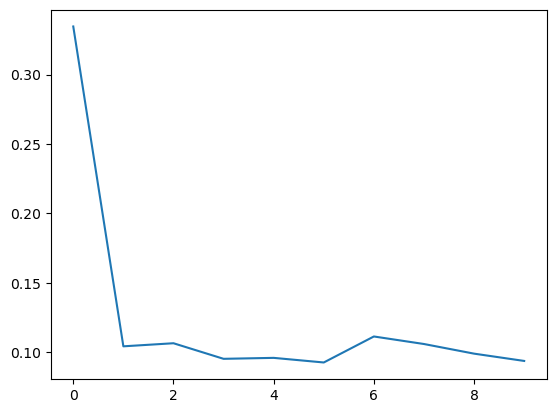

In [8]:
NN = NeuralNetwork()

err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [9]:
# stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}
# returns the dict key with the highest probablity

def getClass(dict):
    max_key = max(dict, key=dict.get)
    return (max_key)

In [10]:
# testing a random input

pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[6.61358678e-01 1.39544662e-11 9.69159621e-13 3.34986972e-03
 1.43253527e-02]
{'Class-0': 66.1358678255863, 'Class-1': 1.3954466162691299e-09, 'Class-2': 9.691596207192552e-11, 'Class-3': 0.3349869723796319, 'Class-4': 1.4325352725530702}
Class-0


In [11]:
## Performance matrix

predictions = NN.feedForward(features_test)

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.46
Precision for each class:
Class 0: 0.5
Class 1: 0.4222222222222222
Class 2: 0.3333333333333333
Class 3: 0.525
Class 4: 0.4642857142857143
Recall: 0.4415632754342432
F1 Score overall: 0.43755628223596466


C:\Users\User\AppData\Local\Temp\ipykernel_12076\3398579157.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [12]:
# f1 score for each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.423076923076923
Class 1: 0.5066666666666666
Class 2: 0.28571428571428575
Class 3: 0.5316455696202531
Class 4: 0.44067796610169496


Confusion Matrix:
[[11  7  4  1  7]
 [ 2 19  0  6  3]
 [ 3  3  5  7  2]
 [ 4  8  3 21  3]
 [ 2  8  3  5 13]]


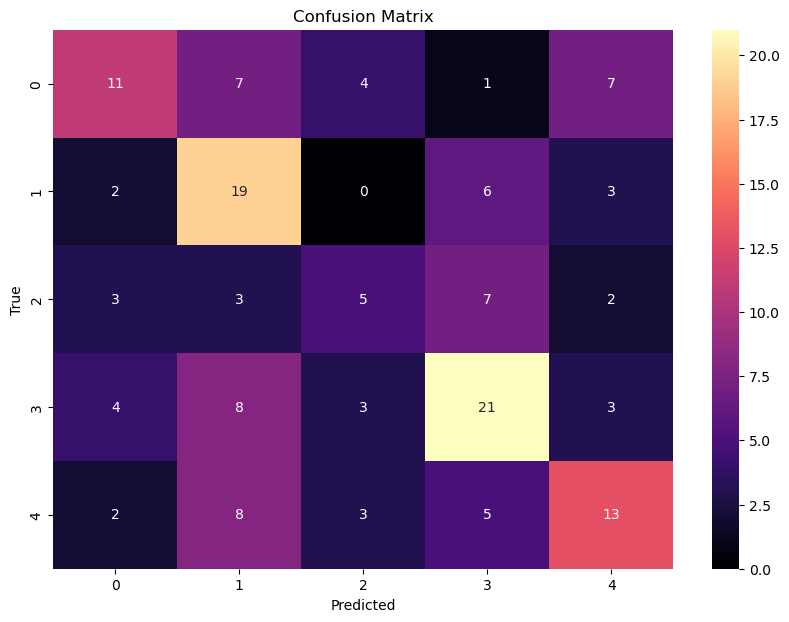

In [13]:
## Result Analysis

# confusion matrix
def conf(Y_true, Y_pred, c = 'magma'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

conf(Y_true, Y_pred)
print()

# Documentation
Neural Network Architecture:

1. Output layer: The output layer has been modified to have 5 neurons, corresponding to the number of classes. This is     essential for multi-class classification.

2. Activation function: Sigmoid activation function is used. It provides an output that is easy to interpret as a probability, although in modern deep learning, other activation functions are often preferred for hidden layers due to their better performance in training complex models.

3. Loss Function: The code currently lacks an explicit loss function. Categorical cross-entropy is a suitable choice for multi-class classification. This will be implemented to quantify the error between predicted and true probabilities.

4. Backpropagation: The backpropagation algorithm has been adjusted to accommodate the softmax output layer and categorical cross-entropy loss. The error calculation for the output layer is modified accordingly.

5. Evaluation Metrics: The code currently lacks evaluation metrics. Metrics like accuracy, precision, recall, and F1-score will be implemented to assess the model's performance.
    
Challenges and Solutions:

1. Output layer activation: Choosing the appropriate activation function for the output layer was crucial. Softmax was selected as it's suitable for multi-class classification.

2. Loss function: Implementing the correct loss function (categorical cross-entropy) is essential for effective training.

3. Backpropagation adjustments: Modifying the backpropagation algorithm to work with softmax and categorical cross-entropy required careful attention to the error calculations.

4. Evaluation metrics: Calculating relevant metrics like accuracy, precision, recall, and F1-score will provide a comprehensive evaluation of the model's performance.

# Conclusion

The goal of this assignment was to design and assess a three-layer neural network for multi-class classification. By using a synthetic dataset, one-hot encoding, and a neural network framework featuring sigmoid activation and categorical cross-entropy loss, a functional model was successfully developed.

The model's effectiveness relied significantly on the proper management of multi-class data, including the selection of activation functions and loss metrics. Evaluation metrics such as accuracy, precision, recall, and F1-score offered valuable insights into the model's performance.

Although the model achieved basic functionality, there is room for improvement. Future enhancements could involve tuning hyperparameters, applying regularization techniques, and experimenting with various network architectures. Moreover, addressing issues related to data imbalance and complex real-world datasets will be essential for practical use.

 